In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
x_train = pd.read_csv('train.csv',header=None)
y_train = pd.read_csv('trainLabels.csv',header=None)
x_test = pd.read_csv('test.csv',header=None)

In [37]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [38]:
from sklearn.cross_validation import train_test_split as tts
x1,x2,y1,y2 = tts(x_train,y_train,test_size=0.3,random_state=4)

In [39]:
# from sklearn.preprocessing import StandardScaler
# std = StandardScaler()
# std.fit(x1)
# print(x2)
# print('-------')
# x1 = std.transform(x1)
# x2 = std.transform(x2)
# print(x2)

In [40]:
from sklearn.naive_bayes import GaussianNB as GNB
clf = GNB()

In [41]:
clf.fit(x1,y1)

/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(x2),y2)

0.84666666666666668

In [43]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')


In [44]:
clf.fit(x1,y1)

/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
accuracy_score(clf.predict(x2),y2)

0.91333333333333333

In [46]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1,random_state=0)
ppn.fit(x1,y1)
accuracy_score(ppn.predict(x2),y2)

/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.70666666666666667

In [47]:
from sklearn.neighbors import KNeighborsClassifier as KNC

/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.896666666667


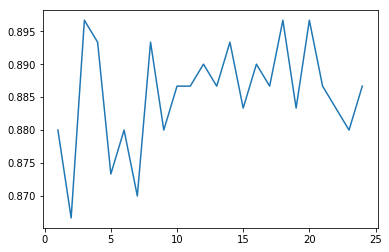

In [48]:
score = []
for i in range(1,25):
    knc = KNC(n_neighbors=i,leaf_size=20)
    knc.fit(x1,y1)
    score.append(accuracy_score(knc.predict(x2),y2))
plt.plot(range(1,25),score)
print(max(score))


In [49]:
df = pd.DataFrame(clf.predict(x_test),index=range(1,9001),columns=['Solution'])

In [50]:
df.index.rename('Id',inplace=True)

In [51]:
df.to_csv('submit.csv')